# **Universidad Pontificia Bolivariana**
Facultad Ingeniería en Energía, Computación y TIC    
Programas de Ingeniería en Sistemas e Informática – Ingeniería en Ciencia de Datos   
**Curso de Inteligencia Artificial**   
NRC: 30188, 31393 – Periodo 202520

## **Simulacro Examen 02**

**Descripción del problema**  

Eres un científico de datos trabajando para el Instituto de Hidrología, Meteorología y Estudios Ambientales (IDEAM). Te han asignado analizar los datos de precipitaciones del Aeropuerto José María Córdova en Medellín durante el primer semestre de 2025. Los datos provienen de sensores automáticos que registran mediciones cada vez que detectan precipitación, excluyendo valores de 0 mm.

Los datos que te entregan están en el archivo `precipitacion_2025sem01_JoseMariaCordova.csv`

En una inspección rápida encuentras:  

- Registros: 1,600 mediciones
- Período: enero - junio 2025
- Variables: FechaObservacion, ValorObservado (mm)
- Características: Sin valores cero, posibles duplicados, formato mixto de fechas
- Frecuencia de medición: cada dos minutos

Adicionalmente:  
- Encuentras gaps o brechas en las mediciones, las cuales corresponden a los momentos en los cuales no se registraron lluvias (valorObservado = 0 mm)

- Encuentras outliers muy elevados pero que ***no corresponden a errores de medición***. Estos datos deben considerarse como mediciones reales en momentos donde las lluvias fueron intensas ***y no deben eliminarse***.



**Etapa 1: Lectura y procesamiento inicial- 10%**

1. Cargar el archivo de datos en un dataframe.
2. Resolver el problema de formatos mixtos de las fechas.
3. Eliminar duplicados temporales (misma fecha/hora y valor)

In [19]:
# 1.1 Carga y primera inspección
print("1.1 CARGA Y PRIMERA INSPECCIÓN")
print("-" * 35)

import pandas as pd

# Cargar los datos
df = pd.read_csv('precipitacion_2025sem01_JoseMariaCordova.csv', sep=';', encoding='utf-8')

print(f"✓ Dataset cargado exitosamente")
print(f"✓ Dimensiones del dataset: {df.shape[0]} filas × {df.shape[1]} columnas")

# Información básica del dataset
print("\nPrimeras 5 filas:")
print(df.head())

print("\nÚltimas 5 filas:")
print(df.tail())

print("\nTipos de datos:")
print(df.dtypes)

print("\nNombres de columnas:")
print(df.columns.tolist())

1.1 CARGA Y PRIMERA INSPECCIÓN
-----------------------------------
✓ Dataset cargado exitosamente
✓ Dimensiones del dataset: 1600 filas × 2 columnas

Primeras 5 filas:
  FechaObservacion  ValorObservado
0  3/01/2025 16:00             0.4
1  3/01/2025 21:00             0.4
2   4/01/2025 0:14             0.4
3   4/01/2025 0:26             0.4
4   4/01/2025 2:30             0.4

Últimas 5 filas:
            FechaObservacion  ValorObservado
1595  06/27/2025 12:26:00 PM             1.2
1596  06/27/2025 12:28:00 PM             1.2
1597  06/27/2025 12:30:00 PM             0.4
1598  06/27/2025 12:32:00 PM             0.4
1599  06/27/2025 12:40:00 PM             0.4

Tipos de datos:
FechaObservacion     object
ValorObservado      float64
dtype: object

Nombres de columnas:
['FechaObservacion', 'ValorObservado']


In [20]:
# 1.2 Evaluación de calidad relacionada con el formato de fechas
print("1.2 EVALUACIÓN DE CALIDAD RELACIONADA CON EL FORMATO DE FECHAS")
print("-" * 50)

registros_iniciales = len(df)
print(f"\nComenzamos el proceso con {registros_iniciales} registros.\n")

# Datos faltantes
print("Datos faltantes por columna:")
missing_data = df.isnull().sum()
for col in df.columns:
    missing_count = missing_data[col]
    missing_pct = (missing_count / len(df)) * 100
    print(f"  - {col}: {missing_count} ({missing_pct:.2f}%)")

# Crear copia para no modificar original
df_procesado = df.copy()

# Conversión de fecha y validación de consistencia
print(f"\nConversión y validación de fechas:")
try:
    df_procesado['FechaObservacion'] = pd.to_datetime(df_procesado['FechaObservacion'])
    print("✓ Conversión de fechas exitosa")

except Exception as e:
    print(f"✗ Error en conversión de fechas: Posible inconsistencia de formato\n")

try:
    print('Intentando conversión de fechas con formato mezclado... un momento por favor!')
    # Convertir la columna de FechaObservacion a datetime, previendo formatos mezclados
    df_procesado['FechaObservacion'] = pd.to_datetime(df_procesado['FechaObservacion'], format='mixed')
    print("✓ Conversión de fechas exitosa")

    # Rango temporal
    fecha_min = df_procesado['FechaObservacion'].min()
    fecha_max = df_procesado['FechaObservacion'].max()
    duracion = fecha_max - fecha_min

    print(f"✓ Rango temporal: {fecha_min} a {fecha_max}")
    print(f"✓ Duración total: {duracion.days} días, {duracion.seconds//3600} horas")

except Exception as e:
    print(f"✗ Error en conversión de fechas: {e}")



1.2 EVALUACIÓN DE CALIDAD RELACIONADA CON EL FORMATO DE FECHAS
--------------------------------------------------

Comenzamos el proceso con 1600 registros.

Datos faltantes por columna:
  - FechaObservacion: 0 (0.00%)
  - ValorObservado: 0 (0.00%)

Conversión y validación de fechas:
✗ Error en conversión de fechas: Posible inconsistencia de formato

Intentando conversión de fechas con formato mezclado... un momento por favor!
✓ Conversión de fechas exitosa
✓ Rango temporal: 2025-01-03 13:24:00 a 2025-06-27 13:02:00
✓ Duración total: 174 días, 23 horas


In [21]:
# 1.3 Evaluación de calidad relacionada con duplicados exactos y temporales
print("1.3 EVALUACIÓN DE CALIDAD RELACIONADA CON DUPLICADOS EXACTOS Y TEMPORALES")
print("-" * 80)

# Duplicados exactos (misma fecha y valor de medición)
print("\nRegistros duplicados exactos (misma fecha, hora y valor):")
duplicados_exactos = df_procesado.duplicated().sum()
print(f"\nDuplicados exactos encontrados: {duplicados_exactos} \n")

if duplicados_exactos > 0:
    print("Ejemplo de duplicados exactos:")
    ejemplos = df_procesado[df_procesado.duplicated(keep=False)].head(6)
    print(ejemplos[['FechaObservacion', 'ValorObservado']])

    # Eliminar duplicados exactos
    df_procesado = df_procesado.drop_duplicates().reset_index(drop=True) # Reset index here
    print(f"✓ Eliminados {duplicados_exactos} duplicados exactos")

# Duplicados temporales (misma fecha pero diferente valor de medición)
print("\nRegistros duplicados temporales (misma fecha y hora pero diferente valor):")

duplicados_temporales = df_procesado.duplicated(subset=['FechaObservacion'], keep=False)
num_duplicados_temporales = duplicados_temporales.sum()

if num_duplicados_temporales > 0:
    print(f"\nDuplicados temporales encontrados: {num_duplicados_temporales}")
    print("Ejemplo de duplicados temporales:")
    ejemplos_temp = df_procesado[duplicados_temporales].head(6)
    print(ejemplos_temp[['FechaObservacion', 'ValorObservado']])

    # Estrategia: mantener el promedio para cada timestamp
    print("Aplicando estrategia: promedio por timestamp")
    df_procesado = df_procesado.groupby('FechaObservacion')['ValorObservado'].mean().reset_index()

    duplicados_resueltos = num_duplicados_temporales - len(df_procesado[df_procesado.duplicated(subset=['FechaObservacion'])])
    print(f"✓ Resueltos {duplicados_resueltos} duplicados temporales mediante promedio")
else:
    print("✓ No se encontraron duplicados temporales")

registros_finales = len(df_procesado)
eliminados = registros_iniciales - registros_finales

print(f"\nResumen eliminación de duplicados:")
print(f"  Registros iniciales: {registros_iniciales:,}")
print(f"  Registros finales: {registros_finales:,}")
print(f"  Registros eliminados: {eliminados:,} ({eliminados/registros_iniciales*100:.2f}%)")

# Valores únicos por columna
print(f"\nValores únicos por columna:")
for col in df.columns:
  print(f"{col}: {df[col].nunique()} valores únicos")

# Validación de valores de medición de precipitaciones
print(f"\nValidación de valores de medicion de precipitaciones:")
medicion_min = df_procesado['ValorObservado'].min()
medicion_max = df_procesado['ValorObservado'].max()
medicion_moda = df_procesado['ValorObservado'].mode()[0]

print(f"✓ Medición mínima: {medicion_min} mm de lluvia")
print(f"✓ Medición máxima: {medicion_max} mm de lluvia")
print(f"✓ Medición Moda (más frecuente): {medicion_moda} mm")

1.3 EVALUACIÓN DE CALIDAD RELACIONADA CON DUPLICADOS EXACTOS Y TEMPORALES
--------------------------------------------------------------------------------

Registros duplicados exactos (misma fecha, hora y valor):

Duplicados exactos encontrados: 45 

Ejemplo de duplicados exactos:
      FechaObservacion  ValorObservado
52 2025-01-03 13:24:00             0.4
53 2025-01-03 13:24:00             0.4
58 2025-01-04 01:20:00             0.4
59 2025-01-04 01:20:00             0.4
60 2025-01-04 06:20:00             0.4
61 2025-01-04 06:20:00             0.4
✓ Eliminados 45 duplicados exactos

Registros duplicados temporales (misma fecha y hora pero diferente valor):
✓ No se encontraron duplicados temporales

Resumen eliminación de duplicados:
  Registros iniciales: 1,600
  Registros finales: 1,555
  Registros eliminados: 45 (2.81%)

Valores únicos por columna:
FechaObservacion: 1555 valores únicos
ValorObservado: 31 valores únicos

Validación de valores de medicion de precipitaciones:
✓ Medici

**Etapa 2: Identificar máxima temporada seca. 20%**

Identifique cual es el gap más largo sin mediciones. Este valor corresponderá a la temporada seca más larga durante el semestre.

**CONCEPTO CLAVE**:    
La ausencia de mediciones indica ausencia de lluvia, por lo tanto, el gap más largo entre mediciones consecutivas representa la temporada seca más extensa.


In [77]:
# 2.1. Análisis univariado - Variables temporales - Fecha de Observación

print("\n2.1. Análisis univariado - Variables temporales - gap más largo sin mediciones")
print("-" * 80)

# Ordenar por fecha
df_ordenado = df_procesado.sort_values('FechaObservacion').reset_index(drop=True)

# Calcular diferencias temporales
df_ordenado['diff_tiempo'] = df_ordenado['FechaObservacion'].diff()

intervalos = df_ordenado['diff_tiempo'].dropna()
maximo_gap = intervalos.max()
indice_maximo_gap = intervalos.idxmax()

fin_temporada_seca = df_ordenado.loc[indice_maximo_gap, 'FechaObservacion']
inicio_temporada_seca = fin_temporada_seca - maximo_gap

print(f"✓ Gap más largo sin mediciones: {maximo_gap}")
print(f"   Desde: {inicio_temporada_seca}")
print(f"   Hasta: {fin_temporada_seca}")


2.1. Análisis univariado - Variables temporales - gap más largo sin mediciones
--------------------------------------------------------------------------------
✓ Gap más largo sin mediciones: 22 days 23:30:00
   Desde: 2025-02-04 23:46:00
   Hasta: 2025-02-27 23:16:00


**Etapa 3: Identificar máxima duración de un evento de lluvia. 20%**

Identifique cuál es la duración máxima de un evento de lluvia según el conjunto de datos suministrado.

Un evento de lluvia es aquel que desde el comienzo hasta el fin, hubo mediciones consecutivas cada dos minutos.

Por ejemplo, el 2 de abril de 2025 entre las 17:40 y las 18:00 hubo mediciones consecutivas cada dos minutos. Ese evento de lluvia tuvo una duración de 20 minutos.


In [89]:
# 3.1. Análisis univariado - Variables temporales - Fecha de Observación

print("\n3.1. Análisis univariado - Variables temporales - duración máxima de un evento de lluvia")
print("-" * 90)

# Ordenar por fecha
df_ordenado = df_procesado.sort_values('FechaObservacion').reset_index(drop=True)

# Calcular diferencias en minutos entre mediciones consecutivas
df_ordenado['diff_minutos'] = df_ordenado['FechaObservacion'].diff().dt.total_seconds() / 60

#Definición del lapso entre mediciones para considerarlas consecutivas
lapso_minutos = 2

df_ordenado['evento'] = (df_ordenado['diff_minutos'] > lapso_minutos).cumsum()
duraciones_eventos = df_ordenado.groupby('evento')['FechaObservacion'].agg(['first', 'last', 'count'])

duraciones_eventos['duracion_min'] = (duraciones_eventos['last'] - duraciones_eventos['first']).dt.total_seconds() / 60
evento_max = duraciones_eventos.loc[duraciones_eventos['duracion_min'].idxmax()]

print(f"Evento de lluvia más largo: {evento_max['duracion_min']} minutos")
print(f"Fecha inicio: {evento_max['first']}")
print(f"Fecha final: {evento_max['last']}\n")





3.1. Análisis univariado - Variables temporales - duración máxima de un evento de lluvia
------------------------------------------------------------------------------------------
Evento de lluvia más largo: 40.0 minutos
Fehca inicio: 2025-06-23 01:46:00
Fecha final: 2025-06-23 02:26:00



**Etapa 4: Totalización por hora y día para hallar las máximas precipitaciones. 30%**

- Totalice todas las mediciones de una fecha y hora para hallar el día y la hora en que más llovió. Por ejemplo, para el 4 de febrero de 2025 a las 5:00 pm, sume todas las mediciones que van entre las 5:00 pm y las 5:59 pm.

- Totalice todas las mediciones de una fecha para hallar el día en que más llovió. Por ejemplo, para el 4 de febrero de 2025, sume todas las mediciones que van entre las 0:00 am y las 11:59 pm.


In [88]:
# 4.1. Totales por  día

print("\n4.1. - Totales por fecha - Día con más lluvia")
print("-" * 50)

# Crear columna de fecha (sin hora) para agrupación
df_procesado['Fecha'] = df_procesado['FechaObservacion'].dt.date


lluvia_por_dia = df_procesado.groupby('Fecha')['ValorObservado'].sum().reset_index()
dia_max_lluvia = lluvia_por_dia.loc[lluvia_por_dia['ValorObservado'].idxmax()]

print("\nDía con más lluvia:")
print(f"Fecha: {dia_max_lluvia['Fecha']}")
print(f"Precipitación total: {dia_max_lluvia['ValorObservado']:.2f} mm")

# 4.2. Totales por hora y día

print("\n4.2. - Totales por fecha y hora - Día con más lluvia")
print("-" * 50)

df_procesado['Hora'] = df_procesado['FechaObservacion'].dt.hour

lluvia_por_hora = df_procesado.groupby(['Fecha', 'Hora'])['ValorObservado'].sum().reset_index()
hora_max_lluvia = lluvia_por_hora.loc[lluvia_por_hora['ValorObservado'].idxmax()]

print("\nHora con más lluvia:")
print(f"Fecha: {hora_max_lluvia['Fecha']}")
print(f"Hora: {hora_max_lluvia['Hora']}")
print(f"Precipitación total: {hora_max_lluvia['ValorObservado']:.2f} mm")


4.1. - Totales por fecha - Día con más lluvia
--------------------------------------------------

Día con más lluvia:
Fecha: 2025-06-23
Precipitación total: 81.20 mm

4.2. - Totales por fecha y hora - Día con más lluvia
--------------------------------------------------

Hora con más lluvia:
Fecha: 2025-01-28
Hora: 4
Precipitación total: 55.80 mm



**Etapa 5: Visualizaciones- 20%**

Utilizando matplotlib, realice las siguientes visualizaciones como gráficos independientes, es decir, sin subdividir la zona de graficación en secciones. Todos los gráficos deben tener títulos descriptivos y ejes etiquetados.

1.	Gráfico que permita entender cuáles son los valores más frecuentes de las mediciones.
2.	Gráfico que permita entender cuales son las duraciones más frecuentes de los eventos de lluvia.


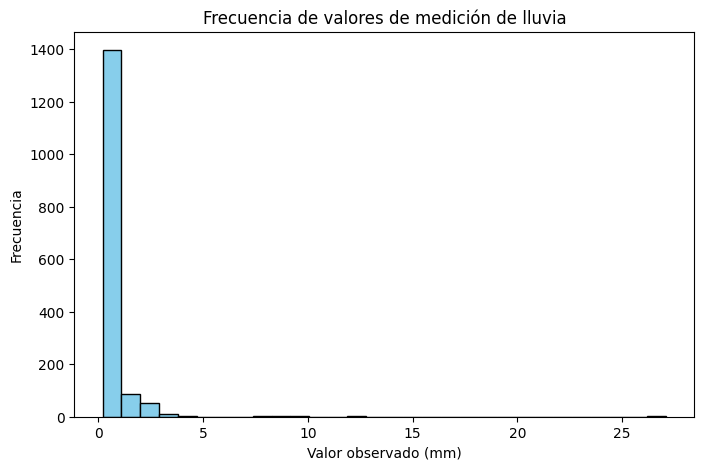

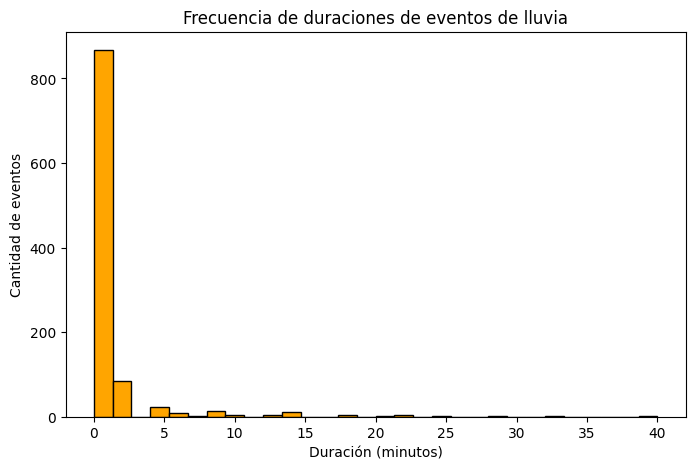

In [93]:
# -----------------------------
# ETAPA 5: VISUALIZACIONES
# -----------------------------

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df_procesado['ValorObservado'], bins=30, color='skyblue', edgecolor='black')
plt.title('Frecuencia de valores de medición de lluvia')
plt.xlabel('Valor observado (mm)')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(8,5))
plt.hist(duraciones_eventos['duracion_min'], bins=30, color='orange', edgecolor='black')
plt.title('Frecuencia de duraciones de eventos de lluvia')
plt.xlabel('Duración (minutos)')
plt.ylabel('Cantidad de eventos')
plt.show()